<a href="https://colab.research.google.com/github/aalexakos/thesis-smart-grids/blob/main/analytics_per_hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import time
import numpy as np
from ast import literal_eval
from sklearn.metrics import *
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive/')

data_location = '/content/drive/MyDrive/alexakos-thesis/'

csv=(f'{data_location}datasets/monthly_data.csv') 
df=pd.read_csv(csv)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['hour']=df['datetime'].dt.hour.reset_index(drop=True)
df.drop(df[df.hour == 18].index, inplace=True)
# df.drop(df[df.hour == 17].index, inplace=True)
# df.drop(df[df.hour == 16].index, inplace=True)



Mounted at /content/drive/


In [2]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

               datetime   sensor_avg  active_power  openweathermap  \
0   2021-06-01 03:00:00    23.467358     65.812500            0.00   
1   2021-06-01 04:00:00    69.214333    272.940000            0.00   
2   2021-06-01 05:00:00   259.855359   1089.745098          173.51   
3   2021-06-01 06:00:00   492.937133   2091.360000          368.24   
4   2021-06-01 07:00:00   695.443333   2893.392157          564.29   
5   2021-06-01 08:00:00   855.856471   3492.411765          740.12   
6   2021-06-01 09:00:00   954.299933   3834.920000          879.26   
7   2021-06-01 10:00:00   985.218627   3998.803922          969.43   
8   2021-06-01 11:00:00   939.931600   3794.840000         1002.88   
9   2021-06-01 12:00:00   863.812745   3648.700000          976.78   
10  2021-06-01 13:00:00   703.120733   3046.420000          893.37   
11  2021-06-01 14:00:00   517.700327   2288.117647          741.63   
12  2021-06-01 15:00:00   279.695533   1246.740000          572.82   
13  2021-06-01 16:00

In [3]:
csv=(f'{data_location}datasets/effective_irradiance.csv') 
effective_irradiance=pd.read_csv(csv)
effective_irradiance['datetime'] = pd.to_datetime(effective_irradiance['datetime'], errors='coerce')
effective_irradiance.fillna(0, inplace=True)
effective_irradiance.head(20)

,datetime,effective_irradiance
0,2021-06-01 05:00:00,148.606788
1,2021-06-01 06:00:00,365.502157
2,2021-06-01 07:00:00,583.104990
3,2021-06-01 08:00:00,769.212409
4,2021-06-01 09:00:00,908.677306
5,2021-06-01 10:00:00,989.993067
6,2021-06-01 11:00:00,1001.904760
7,2021-06-01 12:00:00,946.265003
8,2021-06-01 13:00:00,828.200281
9,2021-06-01 14:00:00,644.478358


In [4]:
csv=(f'{data_location}datasets/monthly_p_mp.csv') 
p_mp=pd.read_csv(csv)
p_mp['datetime'] = pd.to_datetime(p_mp['datetime'], errors='coerce')
p_mp.head(20)

,startTime,p_mp,datetime
0,2021-06-01 05:00:00+00:00,809.314399,2021-06-01 05:00:00
1,2021-06-01 06:00:00+00:00,1962.195043,2021-06-01 06:00:00
2,2021-06-01 07:00:00+00:00,3028.578494,2021-06-01 07:00:00
3,2021-06-01 08:00:00+00:00,3853.004274,2021-06-01 08:00:00
4,2021-06-01 09:00:00+00:00,4422.514830,2021-06-01 09:00:00
5,2021-06-01 10:00:00+00:00,4727.883741,2021-06-01 10:00:00
6,2021-06-01 11:00:00+00:00,4750.211519,2021-06-01 11:00:00
7,2021-06-01 12:00:00+00:00,4537.882244,2021-06-01 12:00:00
8,2021-06-01 13:00:00+00:00,4042.569371,2021-06-01 13:00:00
9,2021-06-01 14:00:00+00:00,3257.069804,2021-06-01 14:00:00


In [5]:
df=df.merge(effective_irradiance, how='inner', on='datetime').dropna().reset_index(drop=True)
df=df.merge(p_mp, how='left', on='datetime').dropna().reset_index(drop=True)

df.head(5)

,datetime,sensor_avg,active_power,openweathermap,timestamp,dni,dhi,climacell,temp_air,windSpeed,weatherCode,pySolar,altidute,p_solar_horizontal,horizontal_avg,openweather_modular,climacell_modular,modular_avg,hour,effective_irradiance,startTime,p_mp
0,2021-06-01 05:00:00,259.855359,1089.745098,173.51,1.622524e+09,531.66,52.97,130.54,15.40,1.38,1101.0,584.774023,18.692675,553.927928,152.025,367.385244,276.401762,321.893503,5,148.606788,2021-06-01 05:00:00+00:00,809.314399
1,2021-06-01 06:00:00,492.937133,2091.360000,368.24,1.622527e+09,708.14,76.03,307.79,17.40,0.78,1101.0,734.007108,30.147389,634.722612,338.015,574.312851,480.034088,527.173469,6,365.502157,2021-06-01 06:00:00+00:00,1962.195043
2,2021-06-01 07:00:00,695.443333,2893.392157,564.29,1.622531e+09,802.75,93.08,523.31,18.76,1.27,1100.0,810.078312,41.766524,604.209308,543.800,711.323696,659.665781,685.494738,7,583.104990,2021-06-01 07:00:00+00:00,3028.578494
3,2021-06-01 08:00:00,855.856471,3492.411765,740.12,1.622534e+09,831.14,127.06,710.12,20.08,2.41,1100.0,852.331947,53.208948,510.460364,725.120,780.150025,748.527450,764.338738,8,769.212409,2021-06-01 08:00:00+00:00,3853.004274
4,2021-06-01 09:00:00,954.299933,3834.920000,879.26,1.622538e+09,855.76,148.27,799.27,20.76,3.62,1100.0,875.660148,63.792161,386.716568,839.265,789.543614,717.715493,753.629553,9,908.677306,2021-06-01 09:00:00+00:00,4422.514830


In [6]:
csv=(f'{data_location}datasets/adapted_p_mp.csv') 
adapted_power=pd.read_csv(csv,index_col=0)
adapted_power['datetime'] = pd.to_datetime(adapted_power['datetime'], errors='coerce')

adapted_power.head(10)
df=df.merge(adapted_power, how='left', on='datetime').fillna(0).reset_index(drop=True)

In [7]:
df.head(25)

,datetime,sensor_avg,active_power,openweathermap,timestamp,dni,dhi,climacell,temp_air,windSpeed,weatherCode,pySolar,altidute,p_solar_horizontal,horizontal_avg,openweather_modular,climacell_modular,modular_avg,hour,effective_irradiance,startTime,p_mp,p_mp_adapted
0,2021-06-01 05:00:00,259.855359,1089.745098,173.51,1.622524e+09,531.66,52.97,130.54,15.40,1.38,1101.0,584.774023,18.692675,553.927928,152.025,367.385244,276.401762,321.893503,5,148.606788,2021-06-01 05:00:00+00:00,809.314399,1666.141038
1,2021-06-01 06:00:00,492.937133,2091.360000,368.24,1.622527e+09,708.14,76.03,307.79,17.40,0.78,1101.0,734.007108,30.147389,634.722612,338.015,574.312851,480.034088,527.173469,6,365.502157,2021-06-01 06:00:00+00:00,1962.195043,1742.677216
2,2021-06-01 07:00:00,695.443333,2893.392157,564.29,1.622531e+09,802.75,93.08,523.31,18.76,1.27,1100.0,810.078312,41.766524,604.209308,543.800,711.323696,659.665781,685.494738,7,583.104990,2021-06-01 07:00:00+00:00,3028.578494,2707.448023
3,2021-06-01 08:00:00,855.856471,3492.411765,740.12,1.622534e+09,831.14,127.06,710.12,20.08,2.41,1100.0,852.331947,53.208948,510.460364,725.120,780.150025,748.527450,764.338738,8,769.212409,2021-06-01 08:00:00+00:00,3853.004274,3233.095261
4,2021-06-01 09:00:00,954.299933,3834.920000,879.26,1.622538e+09,855.76,148.27,799.27,20.76,3.62,1100.0,875.660148,63.792161,386.716568,839.265,789.543614,717.715493,753.629553,9,908.677306,2021-06-01 09:00:00+00:00,4422.514830,3300.895996
5,2021-06-01 10:00:00,985.218627,3998.803922,969.43,1.622542e+09,902.91,130.82,803.31,21.40,4.38,1100.0,886.379744,71.557286,280.411851,886.370,771.142815,639.000995,705.071905,10,989.993067,2021-06-01 10:00:00+00:00,4727.883741,3053.634843
6,2021-06-01 11:00:00,939.931600,3794.840000,1002.88,1.622545e+09,901.30,140.98,865.61,22.41,5.16,1100.0,886.974467,72.110052,272.469383,934.245,790.720983,682.490417,736.605700,11,1001.904760,2021-06-01 11:00:00+00:00,4750.211519,3056.635284
7,2021-06-01 12:00:00,863.812745,3648.700000,976.78,1.622549e+09,890.45,144.36,762.93,22.35,6.13,1102.0,877.576232,64.961554,371.413346,869.855,861.515086,672.900453,767.207770,12,946.265003,2021-06-01 12:00:00+00:00,4537.882244,2465.857488
8,2021-06-01 13:00:00,703.120733,3046.420000,893.37,1.622552e+09,864.02,145.21,718.67,23.37,6.17,1102.0,856.037927,54.576421,496.173774,806.020,922.405809,742.027808,832.216809,13,828.200281,2021-06-01 13:00:00+00:00,4042.569371,2171.424548
9,2021-06-01 14:00:00,517.700327,2288.117647,741.63,1.622556e+09,777.43,155.24,570.31,22.73,6.45,1001.0,816.678841,43.194381,595.388074,655.970,913.357723,702.367815,807.862769,14,644.478358,2021-06-01 14:00:00+00:00,3257.069804,1529.339959


In [8]:
# export to latex 
temp=df.head(25)
print(temp.to_latex(columns=['datetime',	'sensor_avg',	'openweathermap',	'climacell', 'horizontal_avg',	'openweather_modular',	'climacell_modular',	'modular_avg'], caption="Ενδεικτικός πίνακας με δεδομένα για ανάλυση ηλιακής ακτινοβολίας βε βάση την ώρα",col_space=0))


\begin{table}
\centering
\caption{Ενδεικτικός πίνακας με δεδομένα για ανάλυση ηλιακής ακτινοβολίας βε βάση την ώρα}
\begin{tabular}{llrrrrrrr}
\toprule
{} &            datetime &  sensor\_avg &  openweathermap &  climacell &  horizontal\_avg &  openweather\_modular &  climacell\_modular &  modular\_avg \\
\midrule
0  & 2021-06-01 05:00:00 &  259.855359 &          173.51 &     130.54 &         152.025 &           367.385244 &         276.401762 &   321.893503 \\
1  & 2021-06-01 06:00:00 &  492.937133 &          368.24 &     307.79 &         338.015 &           574.312851 &         480.034088 &   527.173469 \\
2  & 2021-06-01 07:00:00 &  695.443333 &          564.29 &     523.31 &         543.800 &           711.323696 &         659.665781 &   685.494738 \\
3  & 2021-06-01 08:00:00 &  855.856471 &          740.12 &     710.12 &         725.120 &           780.150025 &         748.527450 &   764.338738 \\
4  & 2021-06-01 09:00:00 &  954.299933 &          879.26 &     799.27 &         839.

In [9]:
df.to_csv('total_df.csv', index=False)
!cp total_df.csv "drive/My Drive/alexakos-thesis/datasets"

In [10]:
df['hour'].loc[df['hour'] == 18, ].sum() 

0

In [11]:
#export discrete times
errors = pd.DataFrame(columns=['hour','sensor_avg/clima','sensor_avg/openw','sensor_avg/horiz_avg','sensor_avg/openweather_modular','sensor_avg/climacell_modular','sensor_avg/modular_average','effective_irradiance/sensor_avg','p_mp/activePower','adapted_power/activePower'])
errors['hour']=df['hour']
errors=errors.drop_duplicates()
errors=errors.sort_values(by='hour', ignore_index=True).reset_index(drop=True)

In [12]:
#Error % (park irradiance - sensor average) vs  (climacell)
sensor=[]
climacell=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      climacell.append(df.iloc[i].climacell)
  errors.loc[errors['hour'] == hour_new, 'sensor_avg/clima'] = abs(sum(climacell)-sum(sensor))/sum(sensor)*100
  climacell.clear()
  sensor.clear()

Text(0.5, 0, 'hour')

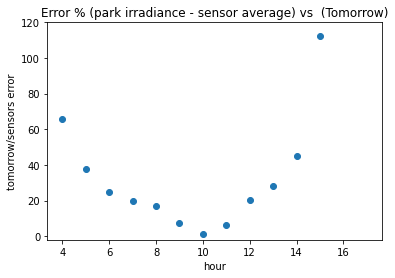

In [13]:
plt.scatter(errors.hour,errors['sensor_avg/clima'])
ax = plt.gca()
ax.set_ylim([-2, 120])
plt.title("Error % (park irradiance - sensor average) vs  (Tomorrow)")
plt.ylabel("tomorrow/sensors error")
plt.xlabel("hour")

In [14]:
#Error % (park irradiance - sensor average) vs  (openweathermap)
sensor=[]
openweathermap=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      openweathermap.append(df.iloc[i].openweathermap)
  errors.loc[errors['hour'] == hour_new, 'sensor_avg/openw'] = abs(sum(openweathermap)-sum(sensor))/sum(sensor)*100
  sensor.clear()
  openweathermap.clear()

Text(0.5, 0, 'hour')

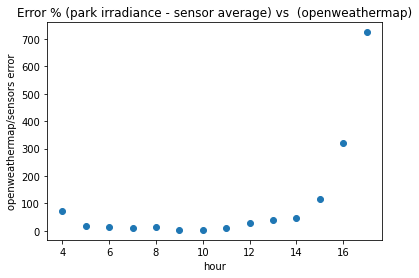

In [15]:
plt.scatter(errors.hour,errors['sensor_avg/openw'])
plt.title("Error % (park irradiance - sensor average) vs  (openweathermap)")
plt.ylabel("openweathermap/sensors error")
plt.xlabel("hour")

In [16]:
#Error % (park irradiance - sensor average) vs  (horizontal_average)
irradiation_values_per_hour = pd.DataFrame({'datetime':pd.date_range('2021-06-01', periods=30)})
irradiation_values_per_hour['datetime']=pd.to_datetime(irradiation_values_per_hour['datetime']).dt.date
sensor=[]
horizontal_average=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      horizontal_average.append(df.iloc[i].horizontal_avg)
  # irradiation_values_per_hour.loc[:,'hour'+str(hour_new)] = pd.Series(horizontal_average)
  if (len(horizontal_average)<30):
    horizontal_average.extend([0] * (len(irradiation_values_per_hour.index) - len(horizontal_average)))
    irradiation_values_per_hour['hour'+str(hour_new)]=horizontal_average

  errors.loc[errors['hour'] == hour_new, 'sensor_avg/horiz_avg'] = abs(sum(horizontal_average)-sum(sensor))/sum(sensor)*100
  horizontal_average.clear()
  sensor.clear()

Text(0.5, 0, 'hour')

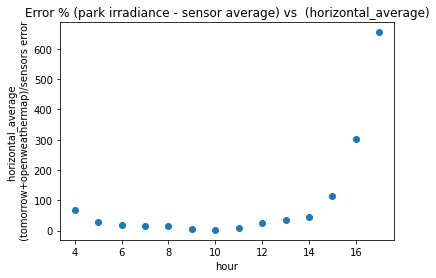

In [17]:
plt.scatter(errors.hour,errors['sensor_avg/horiz_avg'])
plt.title("Error % (park irradiance - sensor average) vs  (horizontal_average)")
plt.ylabel("horizontal_average \n (tomorrow+openweathermap)/sensors error")
plt.xlabel("hour")

Text(0.5, 0, 'hour')

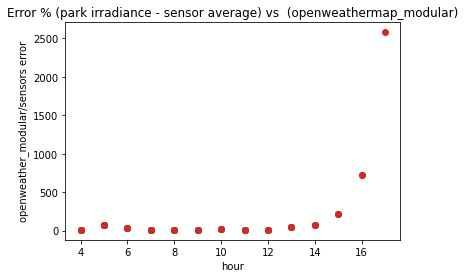

In [18]:
#Error % (park irradiance - sensor average) vs  (openweathermap_modular)
sensor=[]
openweather_modular_temp=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      openweather_modular_temp.append(df.iloc[i].openweather_modular)
  errors.loc[errors['hour'] == hour_new, 'sensor_avg/openweather_modular'] = abs(sum(openweather_modular_temp)-sum(sensor))/sum(sensor)*100
  openweather_modular_temp.clear()
  sensor.clear()
  plt.scatter(errors.hour,errors['sensor_avg/openweather_modular'])
plt.title("Error % (park irradiance - sensor average) vs  (openweathermap_modular)")
plt.ylabel("openweather_modular/sensors error")
plt.xlabel("hour")

Text(0.5, 0, 'hour')

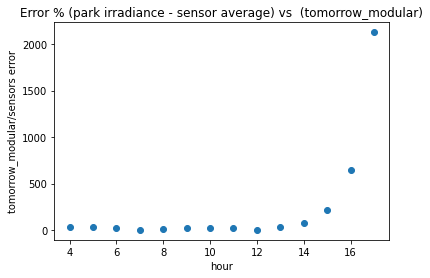

In [19]:
#Error % (park irradiance - sensor average) vs  (tomorrow_modular)
modular_average_values_per_hour=pd.DataFrame()
sensor=[]
climacell_modular_temp=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      climacell_modular_temp.append(df.iloc[i].climacell_modular)
  errors.loc[errors['hour'] == hour_new, 'sensor_avg/climacell_modular'] = abs(sum(climacell_modular_temp)-sum(sensor))/sum(sensor)*100
  modular_average_values_per_hour.loc[:,'hour'+str(hour_new)] = pd.Series(climacell_modular_temp)
  climacell_modular_temp.clear()
  sensor.clear()
plt.scatter(errors.hour,errors['sensor_avg/climacell_modular'])
plt.title("Error % (park irradiance - sensor average) vs  (tomorrow_modular)")
plt.ylabel("tomorrow_modular/sensors error")
plt.xlabel("hour")

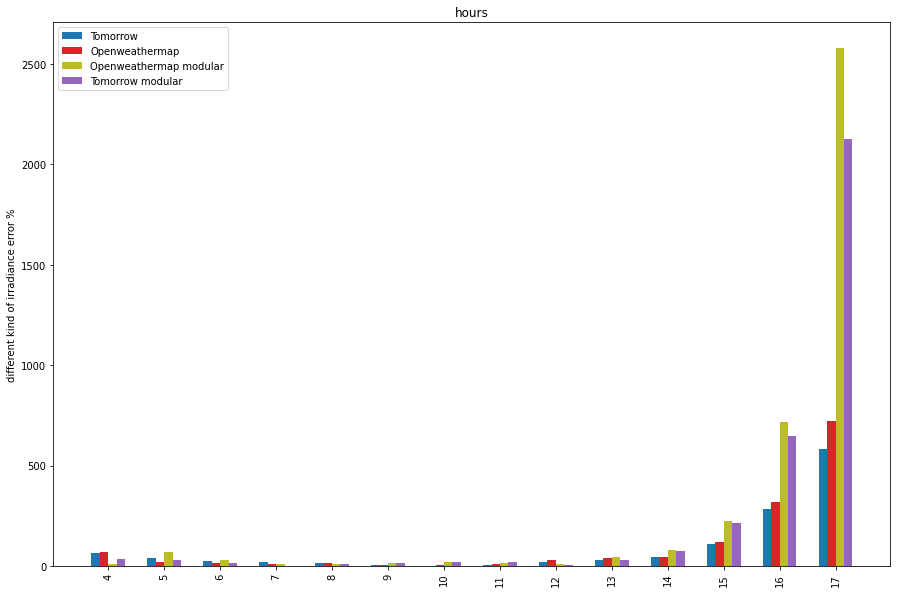

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))

# A little data preparation
years = errors.hour
x = np.arange(len(years))

width=0.15

# Plot each bar plot. Note: manually calculating the 'dodges' of the bars
ax.bar(x - 3*width/2, errors['sensor_avg/clima'], width, label='Tomorrow', color='tab:blue')
ax.bar(x - width/2, errors['sensor_avg/openw'], width, label='Openweathermap', color='tab:red')
ax.bar(x + width/2, errors['sensor_avg/openweather_modular'], width, label='Openweathermap modular', color='tab:olive')
ax.bar(x + 3*width/2, errors['sensor_avg/climacell_modular'], width, label='Tomorrow modular', color='tab:purple')

# Customise some display properties
ax.set_ylabel('different kind of irradiance error %')
ax.set_title('hours')
ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(years.astype(str).values, rotation='vertical')
ax.legend()

# Ask Matplotlib to show the plot
plt.show()

Text(0.5, 0, 'hour')

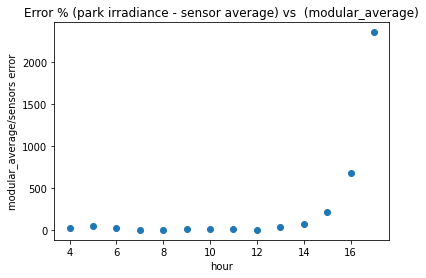

In [21]:
#Error % (park irradiance - sensor average) vs  (horizontal_average)
#modular_average_values_per_hour=pd.DataFrame()
sensor=[]
modular_average_temp=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      modular_average_temp.append(df.iloc[i].modular_avg)
  errors.loc[errors['hour'] == hour_new, 'sensor_avg/modular_average'] = abs(sum(modular_average_temp)-sum(sensor))/sum(sensor)*100
  #modular_average_values_per_hour.loc[:,'hour'+str(hour_new)] = pd.Series(modular_average_temp)
  modular_average_temp.clear()
  sensor.clear()
plt.scatter(errors.hour,errors['sensor_avg/modular_average'])
plt.title("Error % (park irradiance - sensor average) vs  (modular_average)")
plt.ylabel("modular_average/sensors error")
plt.xlabel("hour")

In [22]:
#Error % (park irradiance - sensor average) vs  (pvlib effective irradiance)
sensor=[]
effective_irradiance_average=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].sensor_avg)
      effective_irradiance_average.append(df.iloc[i].effective_irradiance)
  errors.loc[errors['hour'] == hour_new, 'effective_irradiance/sensor_avg'] = abs(sum(effective_irradiance_average)-sum(sensor))/sum(sensor)*100
  sensor.clear()
  effective_irradiance_average.clear()

Text(0, 0.5, 'effective_irradiance/sensors error')

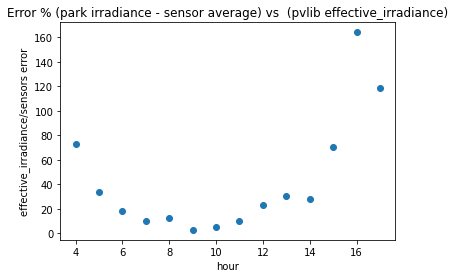

In [23]:
plt.scatter(errors.hour,errors['effective_irradiance/sensor_avg'])
plt.title("Error % (park irradiance - sensor average) vs  (pvlib effective_irradiance)")
plt.xlabel("hour")
plt.ylabel("effective_irradiance/sensors error")

In [24]:
#Error % (park active power) vs  (pvlib p_mp)
sensor=[]
power=[]
diff=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].active_power)
      power.append(df.iloc[i].p_mp)
      diff.append(df.iloc[i].active_power-df.iloc[i].p_mp)
  # errors.loc[errors['hour'] == hour_new, 'p_mp/activePower'] =
  errors.loc[errors['hour'] == hour_new, 'p_mp/activePower'] =abs(sum(power)-sum(sensor))/sum(sensor)*100
  errors.loc[errors['hour'] == hour_new, 'varriance'] = np.std(diff)

  # err=abs(sum(power)-sum(sensor))/len(sensor);
  # tobepr=(f'error for hour {hour_new}is {err}');
  # print(tobepr)
  sensor.clear()
  power.clear()
  diff.clear()

Text(0, 0.5, 'p_mp/active_power error')

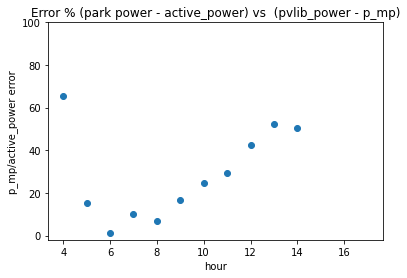

In [25]:
plt.scatter(errors.hour,errors['p_mp/activePower'])
ax = plt.gca()
ax.set_ylim([-2, 100])
plt.title("Error % (park power - active_power) vs  (pvlib_power - p_mp)")
plt.xlabel("hour")
plt.ylabel("p_mp/active_power error")

In [26]:
#Error % (park active power) vs  (adapted pvlib p_mp)
sensor=[]
power=[]
for hour_new in errors['hour']:
  for i,hour in enumerate(df.hour):
    if (hour_new == hour): 
      sensor.append(df.iloc[i].active_power)
      power.append(df.iloc[i].p_mp_adapted)
  # errors.loc[errors['hour'] == hour_new, 'p_mp/activePower'] =
  errors.loc[errors['hour'] == hour_new, 'adapted_power/activePower'] =abs(sum(power)-sum(sensor))/sum(sensor)*100


  # err=abs(sum(power)-sum(sensor))/len(sensor);
  # tobepr=(f'error for hour {hour_new}is {err}');
  # print(tobepr)
  sensor.clear()
  power.clear()
  diff.clear()

Text(0, 0.5, 'p_mp/active_power error')

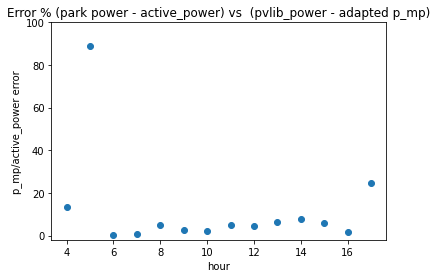

In [27]:
plt.scatter(errors.hour,errors['adapted_power/activePower'])
ax = plt.gca()
ax.set_ylim([-2, 100])

plt.title("Error % (park power - active_power) vs  (pvlib_power - adapted p_mp)")
plt.xlabel("hour")
plt.ylabel("p_mp/active_power error")

In [28]:
errors.to_csv('errors_per_hour.csv', index=False)
!cp errors_per_hour.csv "drive/My Drive/alexakos-thesis/datasets"

In [29]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [30]:
errors

,hour,sensor_avg/clima,sensor_avg/openw,sensor_avg/horiz_avg,sensor_avg/openweather_modular,sensor_avg/climacell_modular,sensor_avg/modular_average,effective_irradiance/sensor_avg,p_mp/activePower,adapted_power/activePower,varriance
0,4,65.524,72.043,68.784,10.871,36.866,23.868,73.073,65.648,13.391,83.913
1,5,37.936,19.651,28.793,69.890,31.187,50.539,33.349,15.413,88.756,270.675
2,6,24.662,15.669,20.166,31.552,17.523,24.538,18.094,0.966,0.362,398.530
3,7,19.826,11.307,15.566,11.840,1.101,6.470,9.880,10.268,0.599,589.759
4,8,16.830,14.086,15.458,9.481,12.376,10.929,12.074,6.922,4.875,665.889
5,9,7.312,4.721,6.016,14.728,17.042,15.885,2.658,16.514,2.731,738.734
6,10,1.098,3.718,2.408,18.372,20.411,19.392,4.776,24.635,2.275,877.871
7,11,6.130,11.447,8.789,13.755,17.832,15.794,10.294,29.486,4.877,1088.572
8,12,20.581,28.013,24.297,10.820,4.427,7.623,23.125,42.518,4.580,1091.367
9,13,28.010,41.550,34.780,43.616,29.920,36.768,30.686,52.362,6.132,950.359


In [31]:
irradiation_values_per_hour

,datetime,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,hour17
0,2021-06-01,20.040,152.025,338.015,543.800,725.120,839.265,886.370,934.245,869.855,806.020,655.970,511.750,358.645,166.515
1,2021-06-02,19.835,156.995,330.840,482.565,421.275,490.915,540.315,623.585,563.300,480.145,420.945,278.125,257.125,130.505
2,2021-06-03,21.170,158.210,341.245,541.620,722.215,865.930,968.230,1008.040,963.920,879.750,743.115,567.655,375.065,184.055
3,2021-06-04,21.875,163.030,352.665,545.020,721.740,868.915,957.870,991.125,956.260,868.355,737.430,565.690,375.830,174.785
4,2021-06-05,21.945,163.975,345.485,525.565,506.820,559.095,628.225,637.025,608.090,514.420,479.070,448.420,325.810,173.190
5,2021-06-06,17.635,163.870,351.050,541.000,712.735,849.360,907.485,887.830,820.695,741.910,434.530,330.530,220.855,93.435
6,2021-06-07,18.915,167.460,343.155,477.615,644.235,773.715,835.990,750.520,848.845,743.875,684.115,539.580,371.565,187.745
7,2021-06-08,22.305,179.875,349.955,534.450,713.390,864.060,955.580,989.400,958.110,869.730,647.770,509.535,349.245,171.510
8,2021-06-09,23.255,157.845,330.000,508.845,589.070,726.215,842.985,827.185,778.050,627.950,238.570,143.385,107.685,62.440
9,2021-06-10,22.435,78.255,265.010,430.005,635.250,817.480,913.390,864.510,787.350,695.495,595.725,484.475,317.155,158.740


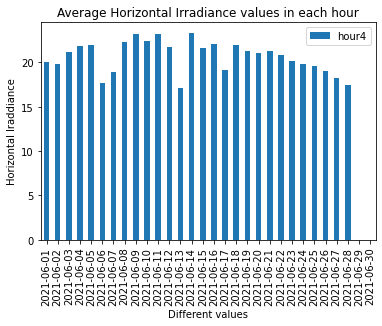

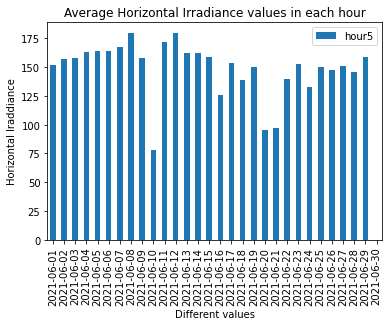

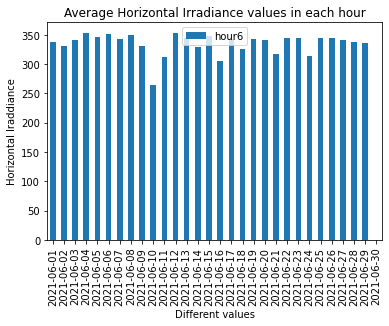

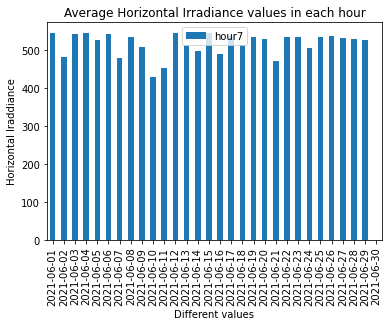

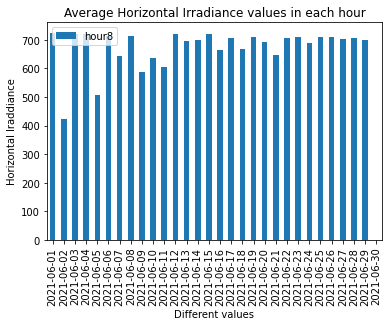

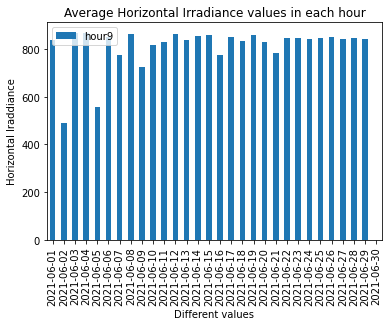

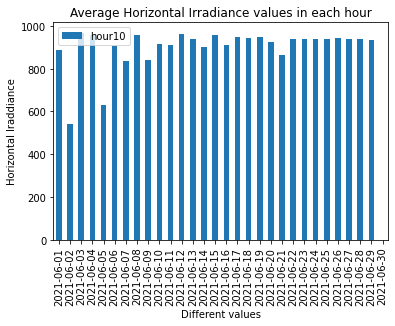

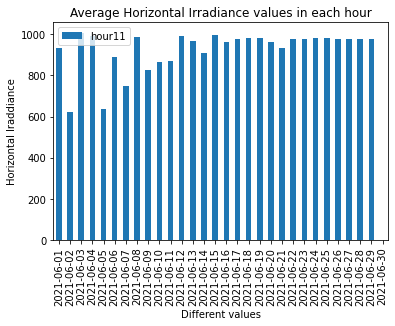

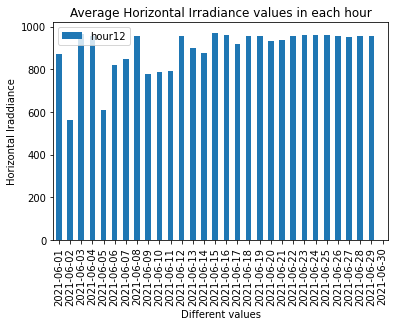

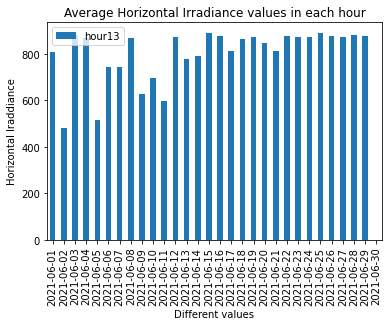

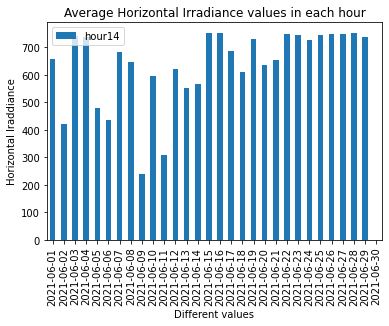

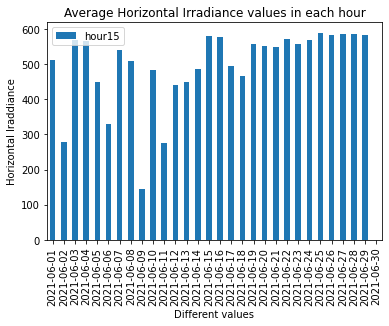

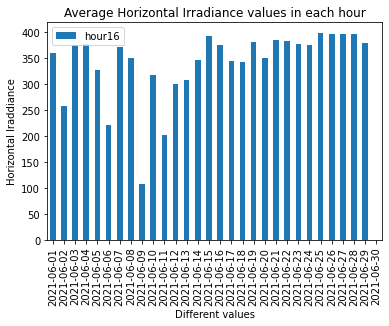

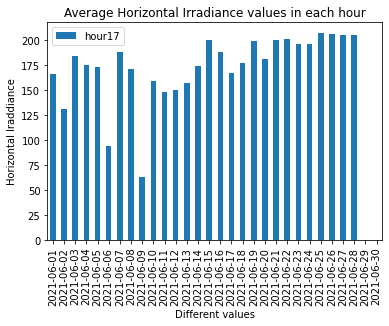

In [32]:
for col in irradiation_values_per_hour.columns[1:]:
  irradiation_values_per_hour.plot.bar(x='datetime', y=col)
  plt.title("Average Horizontal Irradiance values in each hour")
  plt.xlabel("Different values")
  plt.ylabel("Horizontal Iraddiance")
  plt.legend([col])
  plt.show()

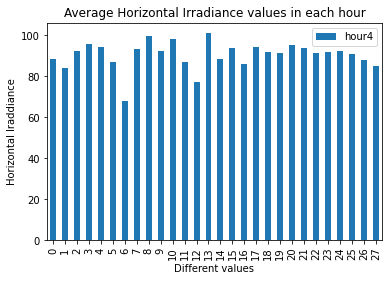

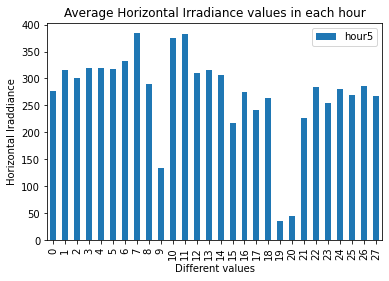

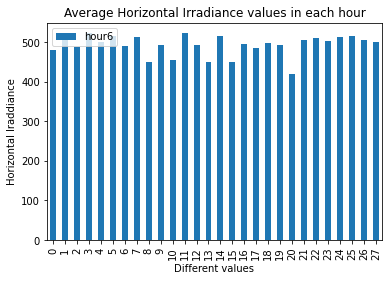

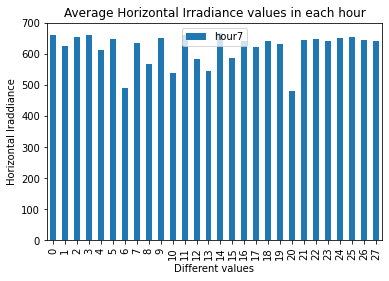

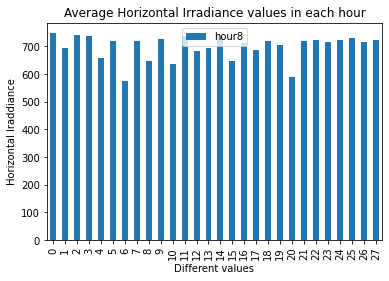

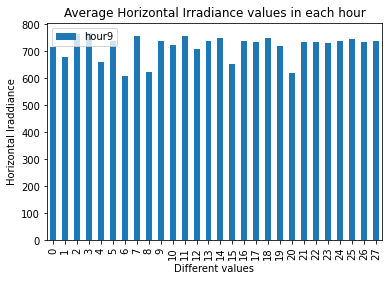

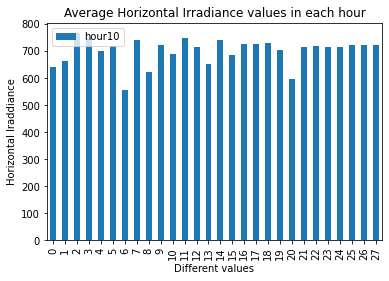

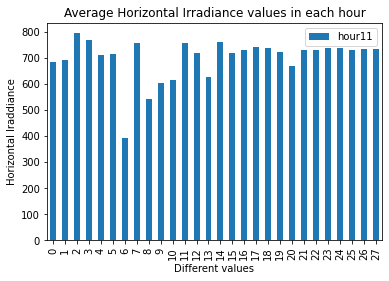

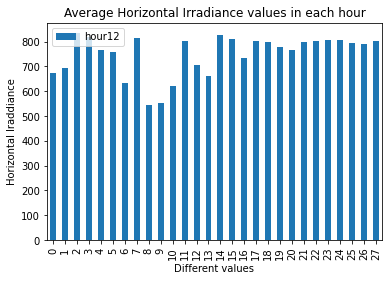

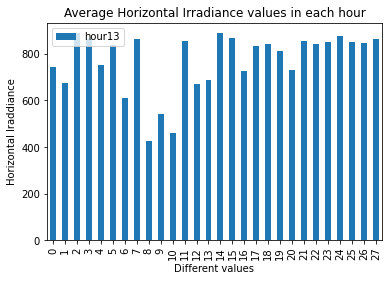

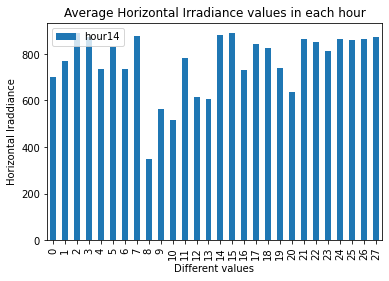

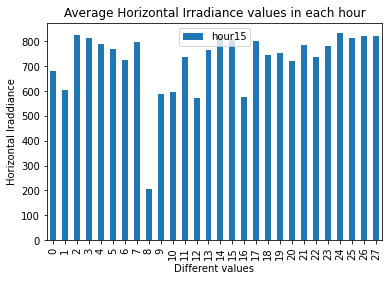

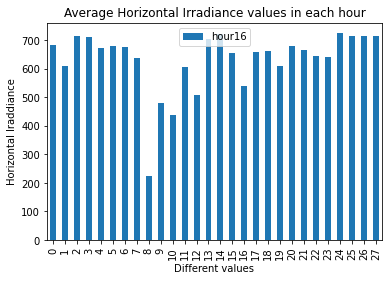

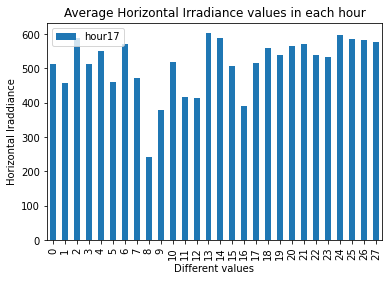

In [33]:
for col in modular_average_values_per_hour.columns:
  modular_average_values_per_hour[col].plot(kind='bar')
  plt.title("Average Horizontal Irradiance values in each hour")
  plt.xlabel("Different values")
  plt.ylabel("Horizontal Iraddiance")
  plt.legend([col])
  plt.show()

In [34]:
irradiation_values_per_hour

,datetime,hour4,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14,hour15,hour16,hour17
0,2021-06-01,20.040,152.025,338.015,543.800,725.120,839.265,886.370,934.245,869.855,806.020,655.970,511.750,358.645,166.515
1,2021-06-02,19.835,156.995,330.840,482.565,421.275,490.915,540.315,623.585,563.300,480.145,420.945,278.125,257.125,130.505
2,2021-06-03,21.170,158.210,341.245,541.620,722.215,865.930,968.230,1008.040,963.920,879.750,743.115,567.655,375.065,184.055
3,2021-06-04,21.875,163.030,352.665,545.020,721.740,868.915,957.870,991.125,956.260,868.355,737.430,565.690,375.830,174.785
4,2021-06-05,21.945,163.975,345.485,525.565,506.820,559.095,628.225,637.025,608.090,514.420,479.070,448.420,325.810,173.190
5,2021-06-06,17.635,163.870,351.050,541.000,712.735,849.360,907.485,887.830,820.695,741.910,434.530,330.530,220.855,93.435
6,2021-06-07,18.915,167.460,343.155,477.615,644.235,773.715,835.990,750.520,848.845,743.875,684.115,539.580,371.565,187.745
7,2021-06-08,22.305,179.875,349.955,534.450,713.390,864.060,955.580,989.400,958.110,869.730,647.770,509.535,349.245,171.510
8,2021-06-09,23.255,157.845,330.000,508.845,589.070,726.215,842.985,827.185,778.050,627.950,238.570,143.385,107.685,62.440
9,2021-06-10,22.435,78.255,265.010,430.005,635.250,817.480,913.390,864.510,787.350,695.495,595.725,484.475,317.155,158.740


In [35]:
pvlib_errors_hour=pd.DataFrame()
pvlib_errors_hour['hour']=errors.hour
pvlib_errors_hour['p_mp/active_power']=errors['p_mp/activePower']	
pvlib_errors_hour['adapted_power/activePower']=errors['adapted_power/activePower']

pvlib_errors_hour.to_csv('pvlib_errors_hour.csv', index=False)

!cp pvlib_errors_hour.csv "drive/My Drive/alexakos-thesis/datasets"